<a href="https://colab.research.google.com/github/asr9876/Data_Analytics_Projects/blob/main/find%20target%20auidence/Find_Target_Auidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [43]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [44]:
df.shape

(11251, 15)

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [47]:
# blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [48]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [49]:
# drop null values
df.dropna(inplace = True)

In [50]:
df['Amount'] = df['Amount'].astype('int')

In [51]:
df['Amount'].dtypes

dtype('int64')

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [53]:
df.describe(include= 'object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


In [54]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [55]:
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [56]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#Exploratory Data Analysis
###Gender

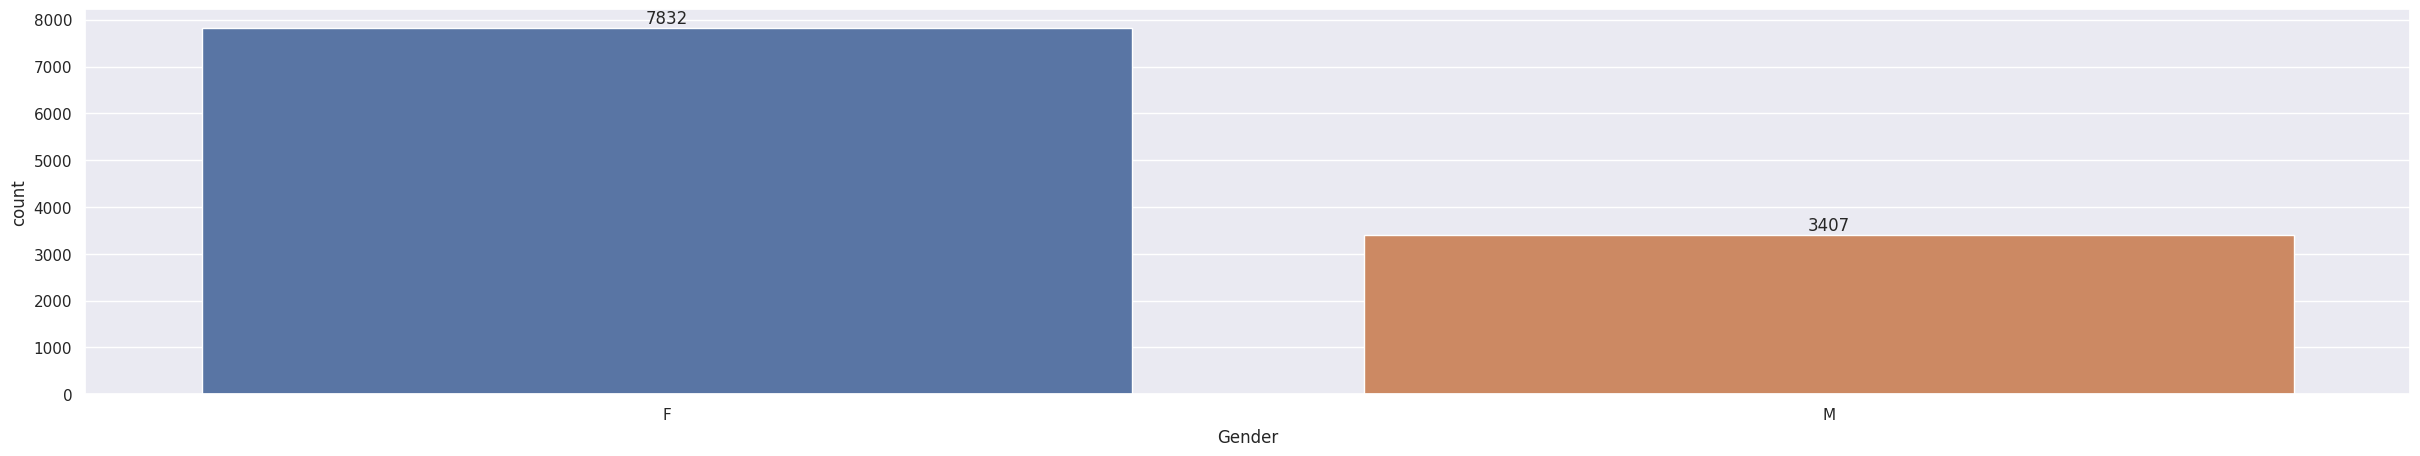

In [57]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

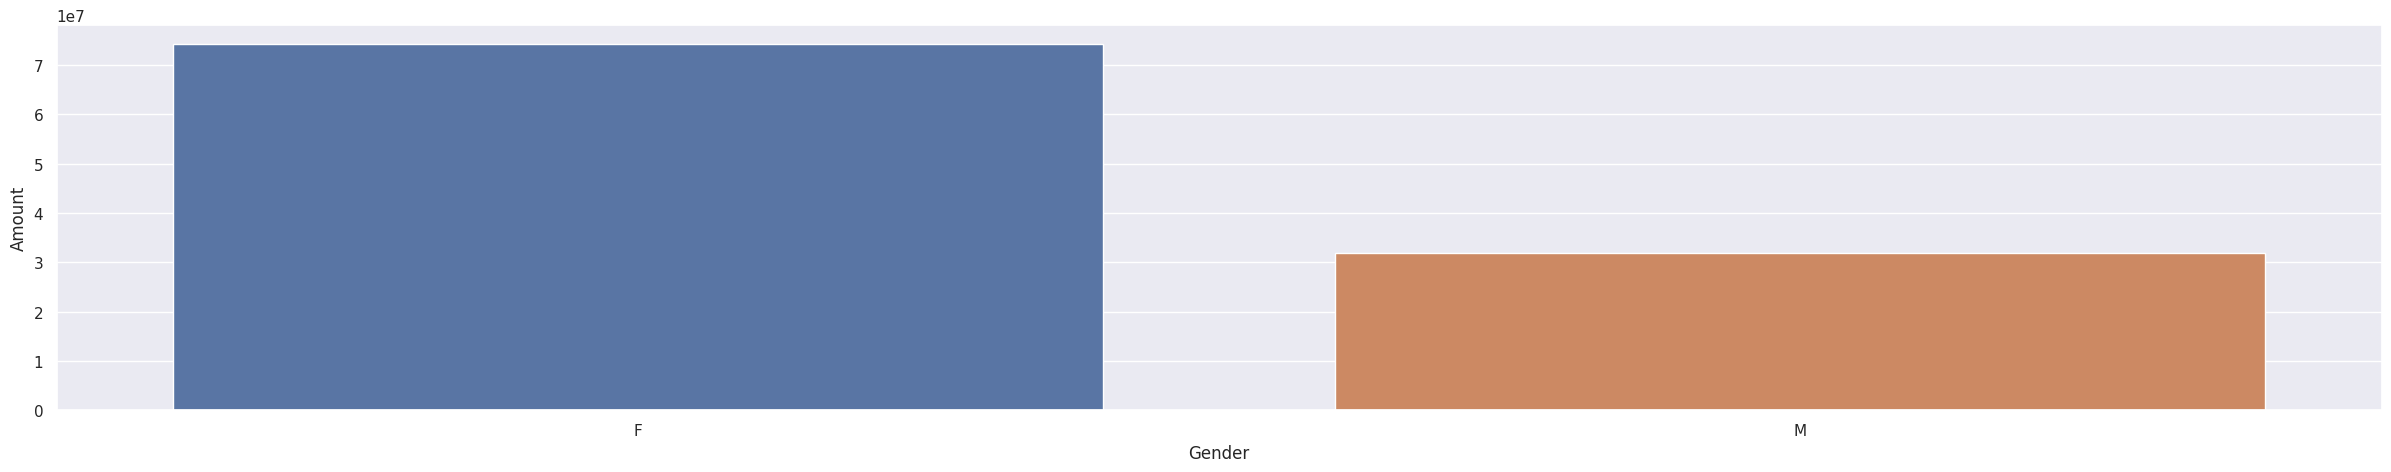

In [58]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Gender',y = 'Amount',data = sales_gen)

In [59]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


*from above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

#Age

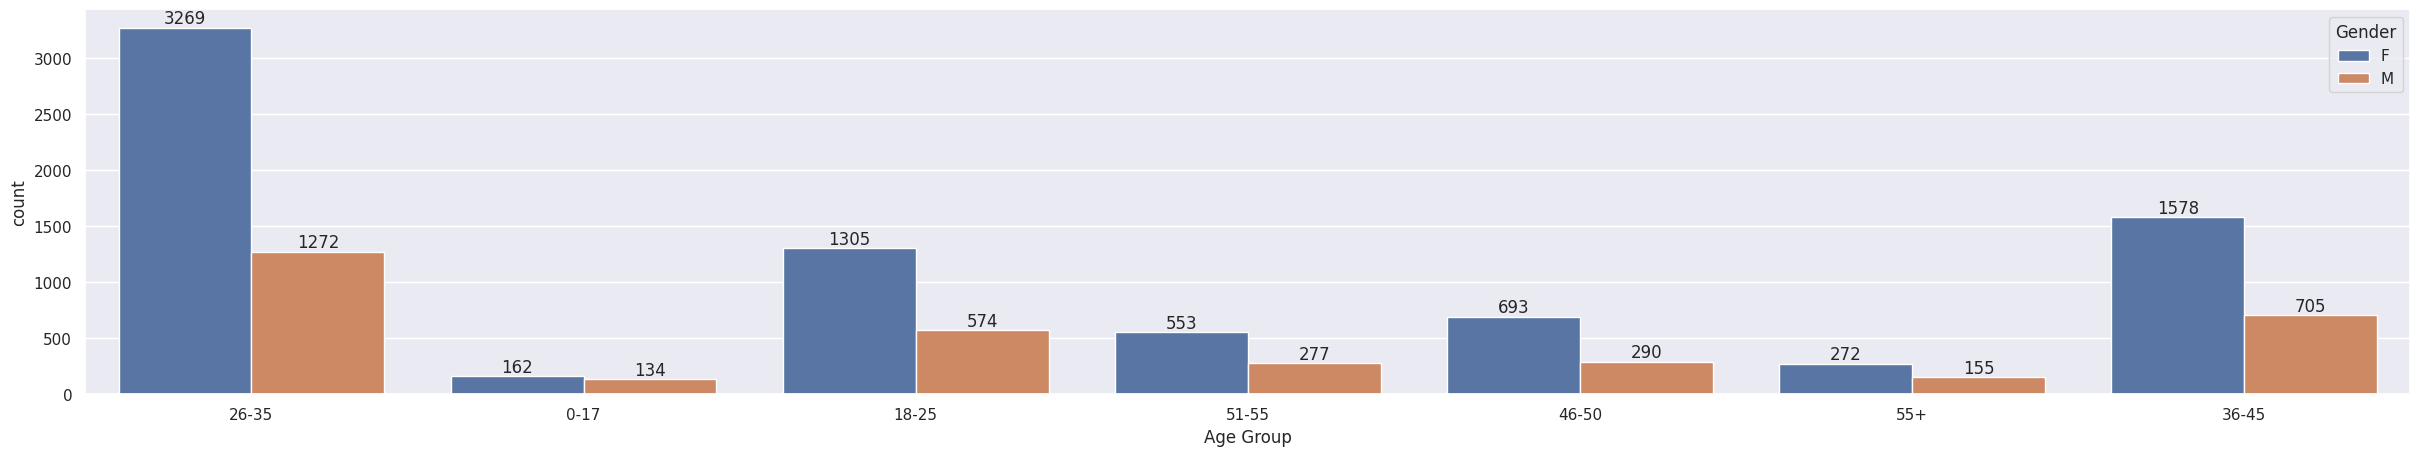

In [60]:
ax = sns.countplot(data = df,x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
  ax.bar_label(bars)


In [61]:
# Total amount vs Age group
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

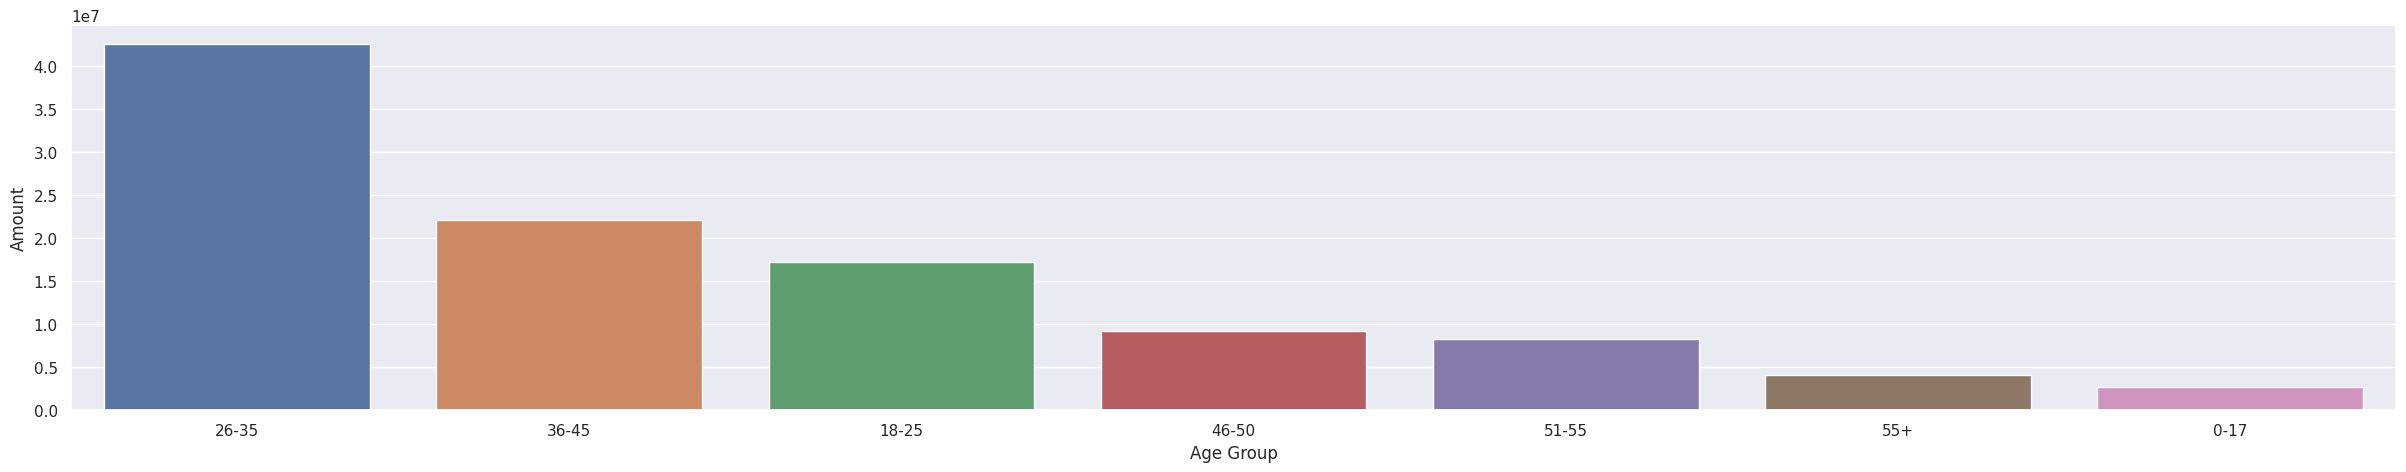

In [62]:
sns.barplot(x = 'Age Group',y = 'Amount', data = sales_age)

In [63]:
order_age = df.groupby(['Age Group'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False)
order_age


,Age Group,Orders
2,26-35,11395
3,36-45,5687
1,18-25,4650
4,46-50,2371
5,51-55,2112
6,55+,1076
0,0-17,690


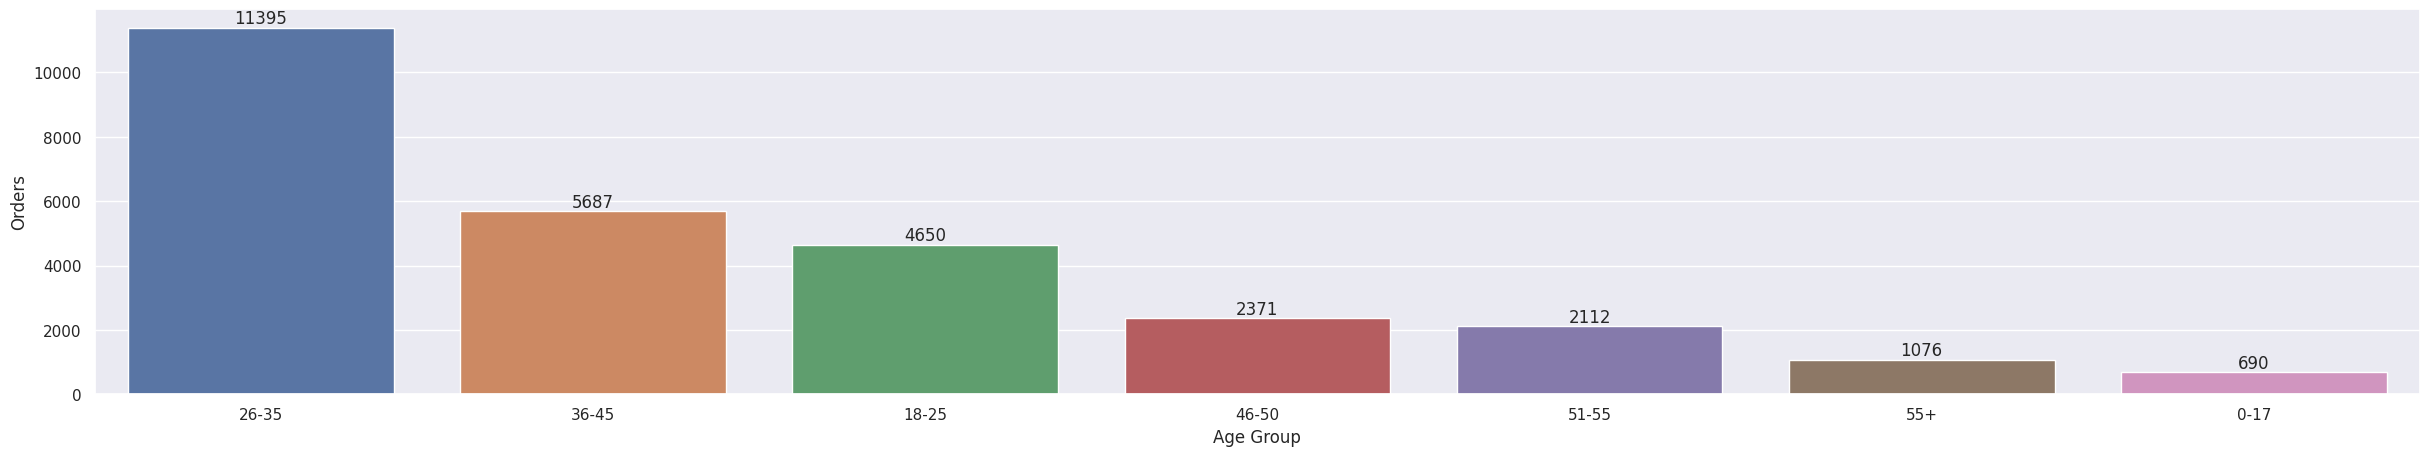

In [64]:
ax = sns.barplot(x = 'Age Group', y = 'Orders',data = order_age)
for bars in ax.containers:
  ax.bar_label(bars)


*from above graphs we can see that most of the buyers are of age group between 26-35yrs female*

In [65]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#Zone 

In [66]:
zone_age = df.groupby(['Zone'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False)
zone_age

,Zone,Orders
0,Central,10623
3,Southern,6740
4,Western,4876
2,Northern,3727
1,Eastern,2015


<Axes: xlabel='Zone', ylabel='Orders'>

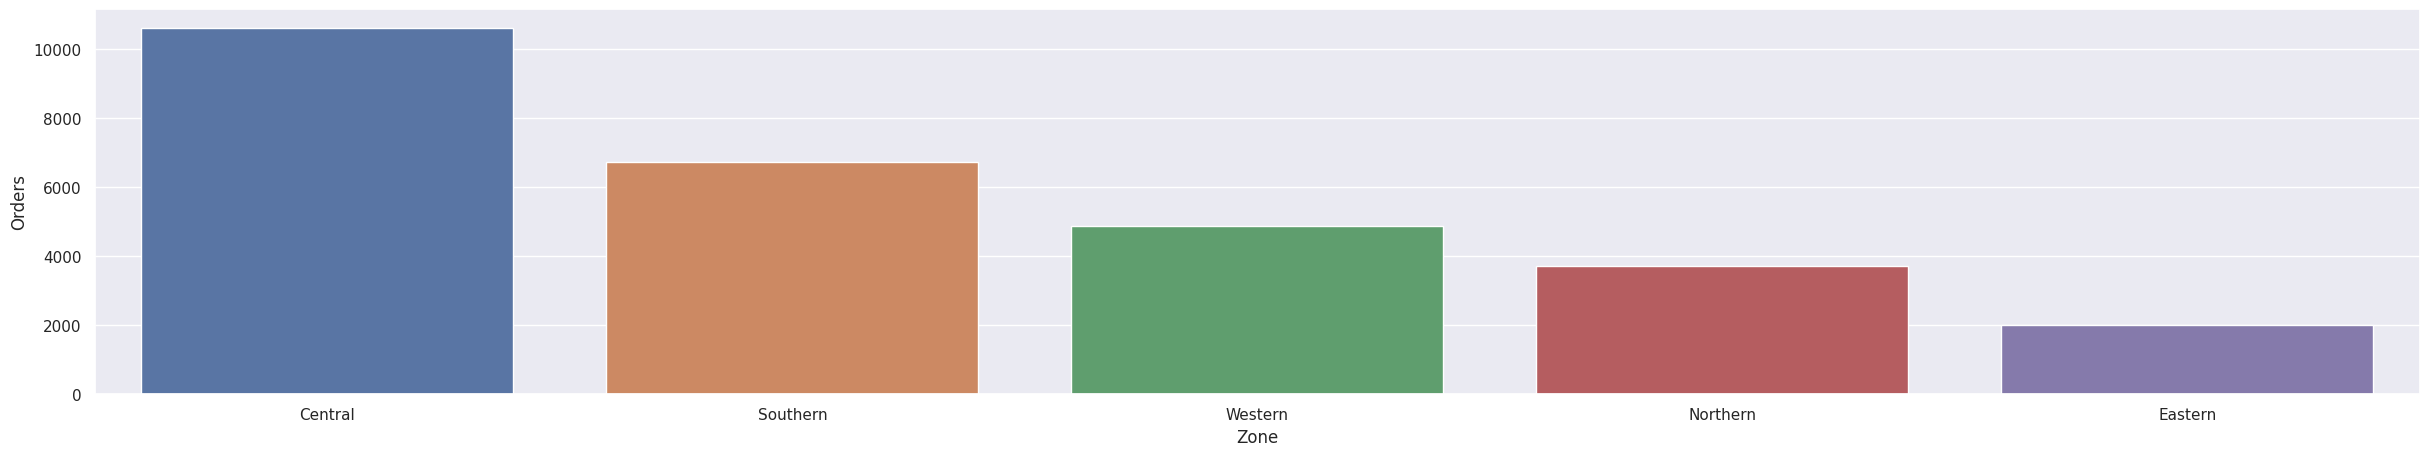

In [67]:
sns.barplot(x = 'Zone', y = 'Orders',data = zone_age)

In [68]:

state_amount = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(7)
state_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368


<Axes: xlabel='State', ylabel='Amount'>

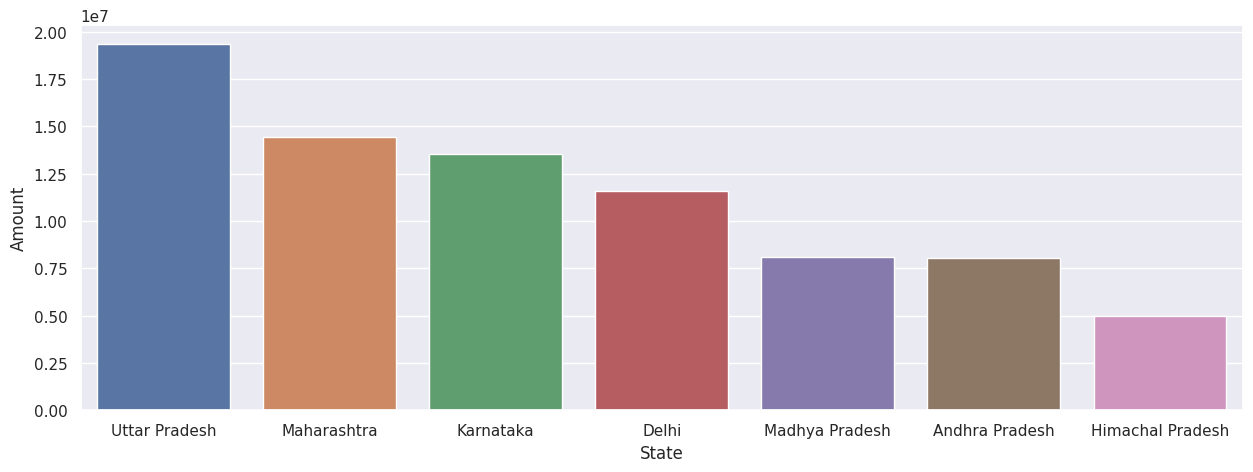

In [69]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State',y = 'Amount',data = state_amount)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pardesh, Maharashtra, Delhi and Karnataka, respectively*

#Marital Status

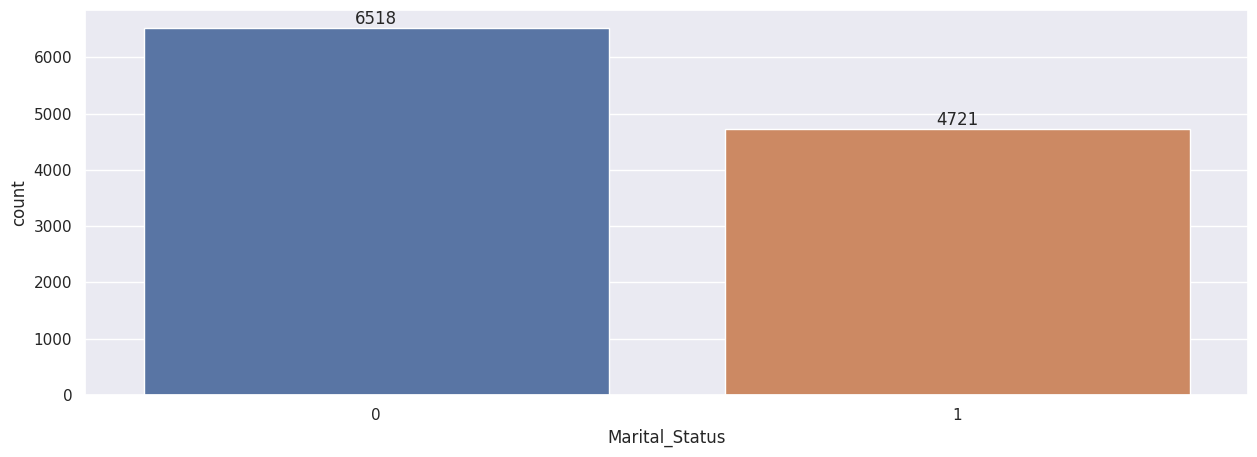

In [70]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc = {'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

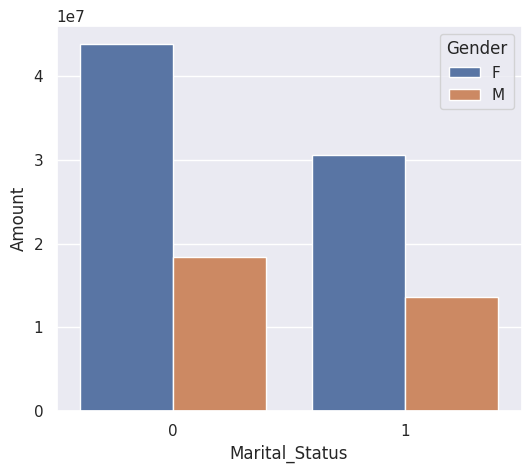

In [71]:

sales_state = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y = 'Amount',hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

#Occupation

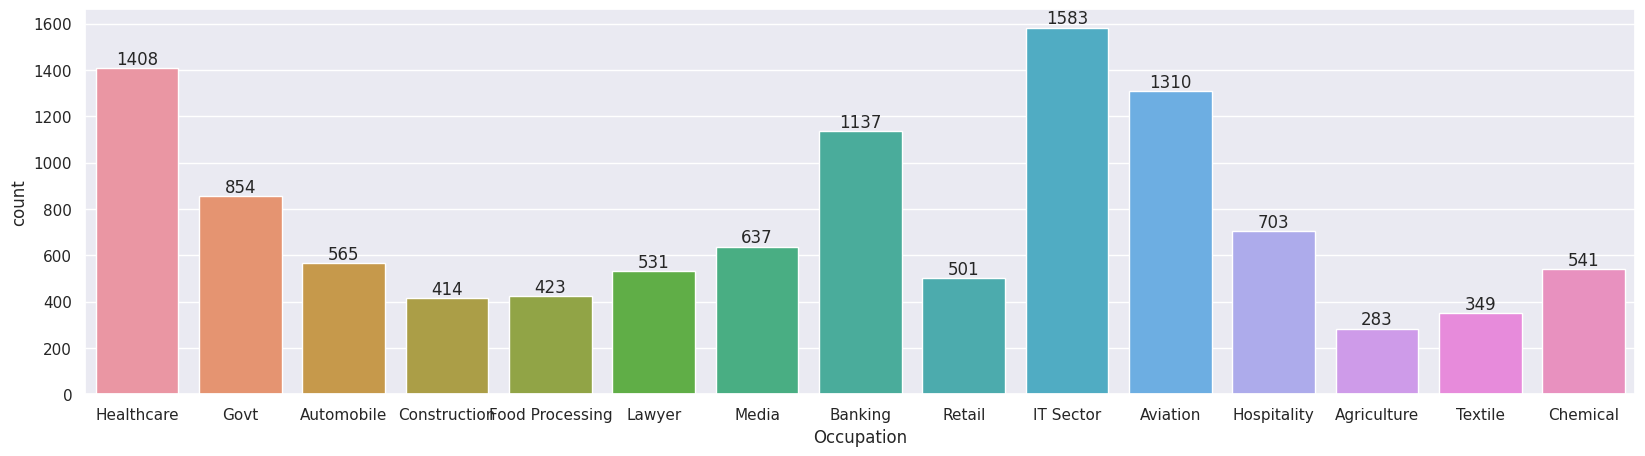

In [72]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

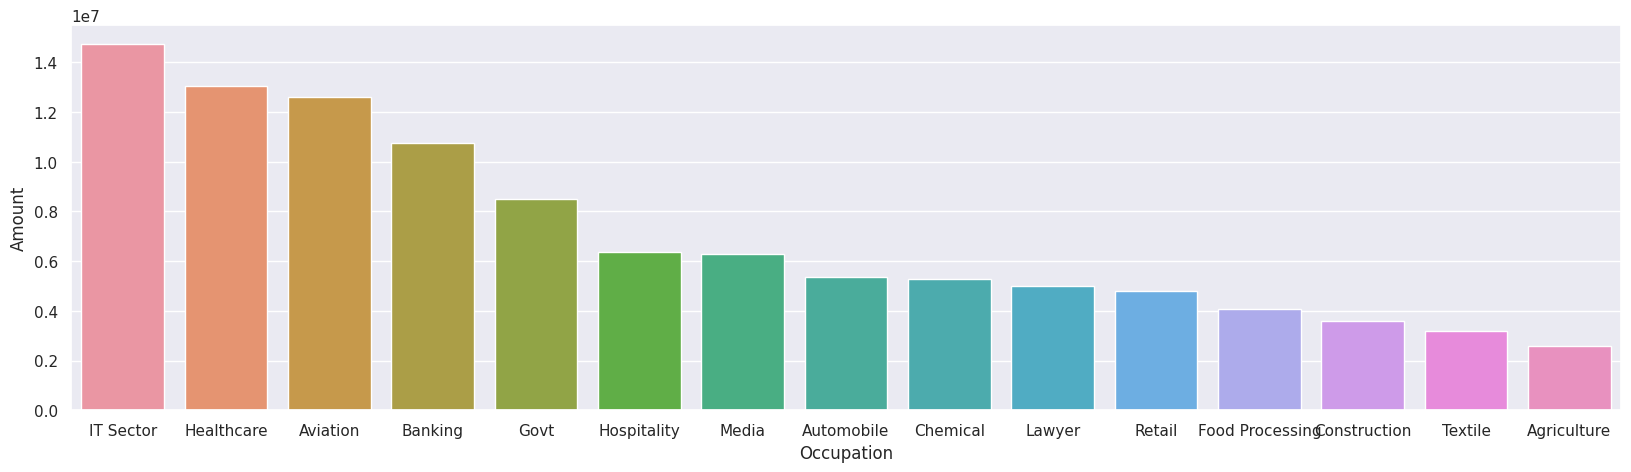

In [73]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT,Healthcare and Aviation sector*

#Product Category 

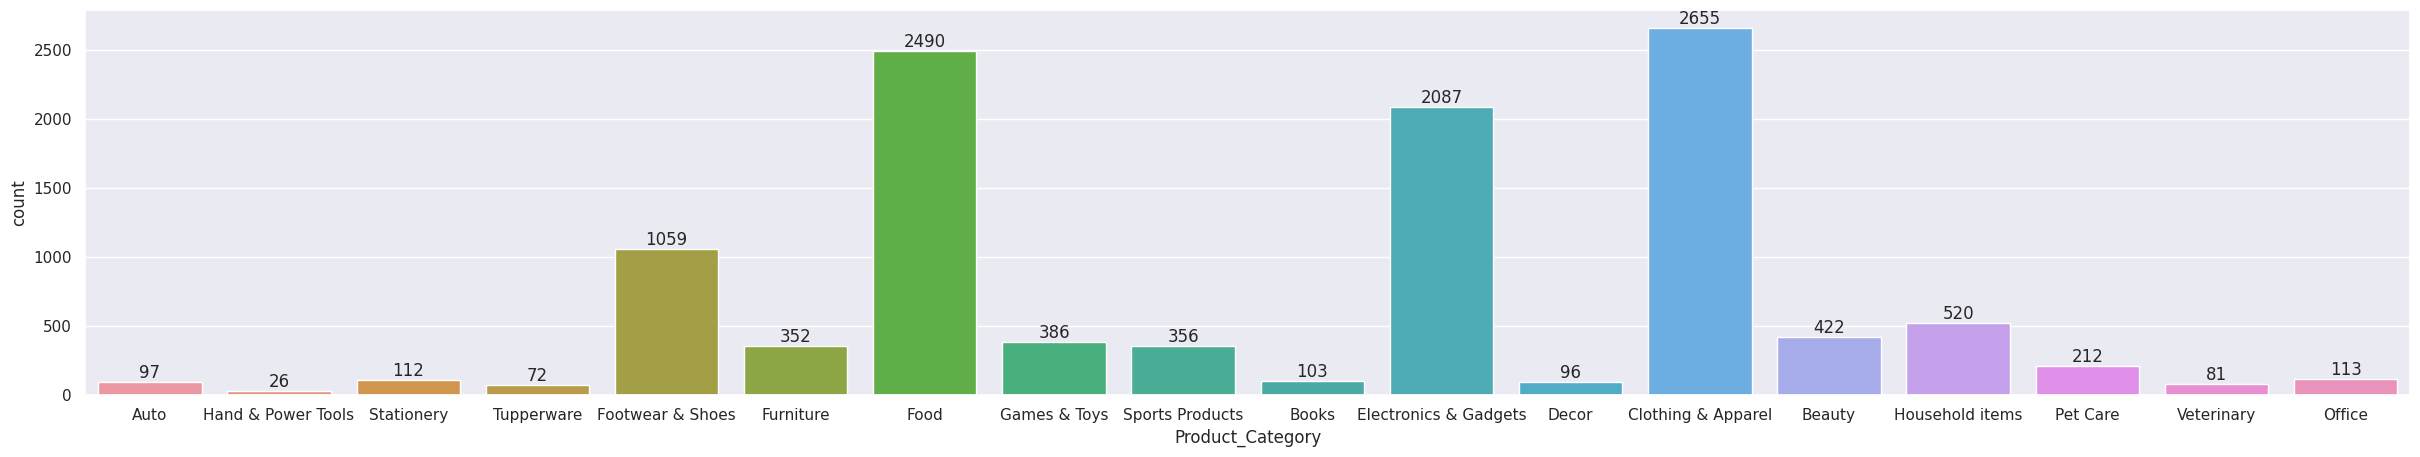

In [74]:
sns.set(rc ={'figure.figsize':(30,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

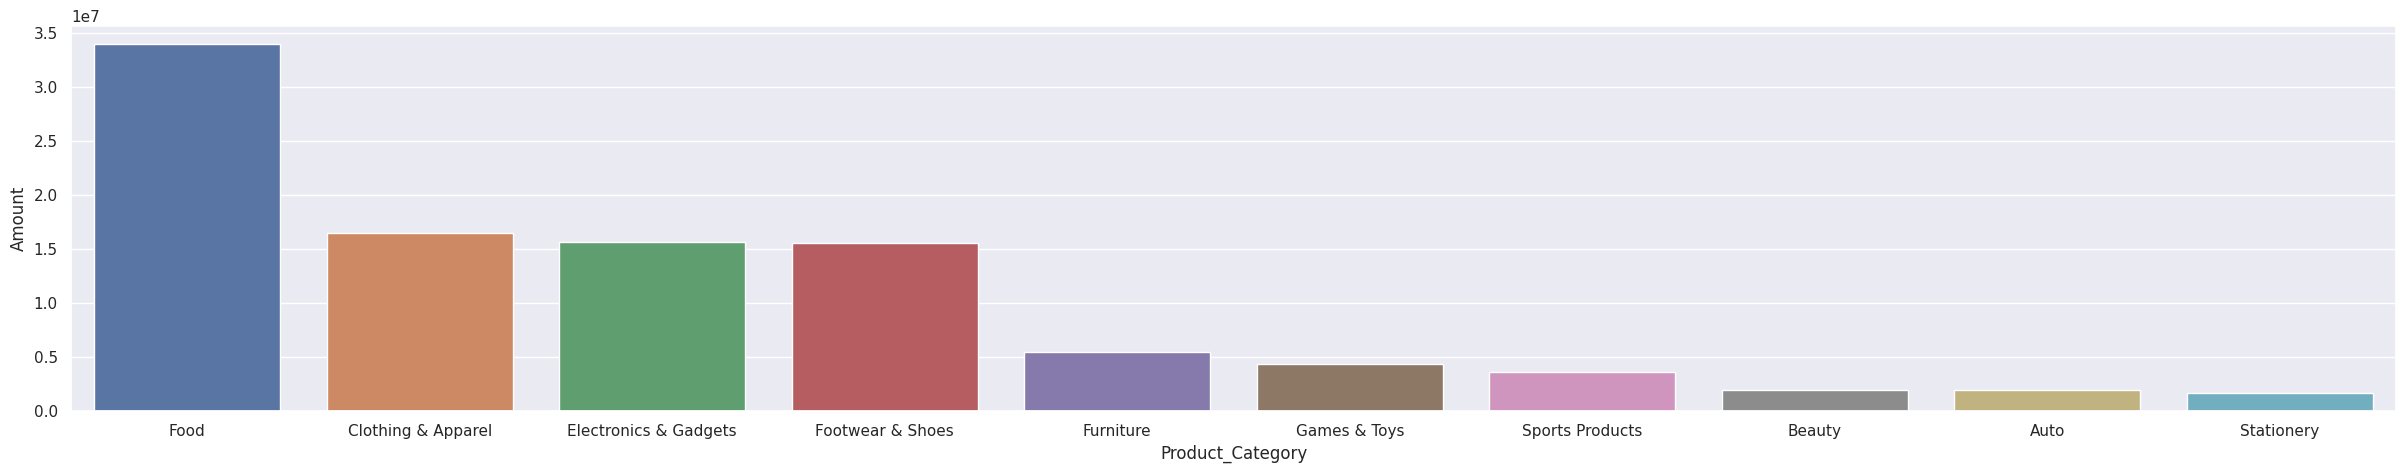

In [75]:
sales_state = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc ={'figure.figsize':(30,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y  = 'Amount')

*From above graphs we can see that most of the sold products are from Food,Clothing and Electronics Category*

#Conclusion:

*Company have to make advertisement like that, ads will target Married women age group 26-35yrs from UP, Maharastra and Karnataka working in IT, HealthCare and Aviation are more likely to buy products like Food,Clothing and Electronics*